In [1]:
import pandas as pd

# Read data
train = pd.read_csv('dengue_features_train.csv')
test = pd.read_csv('dengue_features_test.csv')
labels = pd.read_csv('dengue_labels_train.csv')

In [2]:
#Shape of data
dfs = {'train': train,
      'test': test,
      'labels': labels}

for name, df in dfs.items():
    print('Shape of 'f"{name} data {df.shape}")

Shape of train data (1456, 24)
Shape of test data (416, 24)
Shape of labels data (1456, 4)


# *Cleaning data*

In [3]:
# Convert week_start_date to datetime object
train['week_start_date'] = pd.to_datetime(train['week_start_date'])

In [4]:
# Putting week_start_date to become index
train.index = train['week_start_date']

In [5]:
# Splitting cities
train_sj = train[train['city'] == 'sj'].copy()
train_iq = train[train['city'] == 'iq'].copy()

# *Exploratory Analysis*

In [6]:
# Columns with missing values that are not 0
train_sj.isnull().sum() != 0

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [7]:
# Only columns with missing values
nans_columns = train_sj.columns[4:]
train_sj_nans = train_sj.drop(columns=['city', 'year', 'weekofyear', 'week_start_date']).copy()

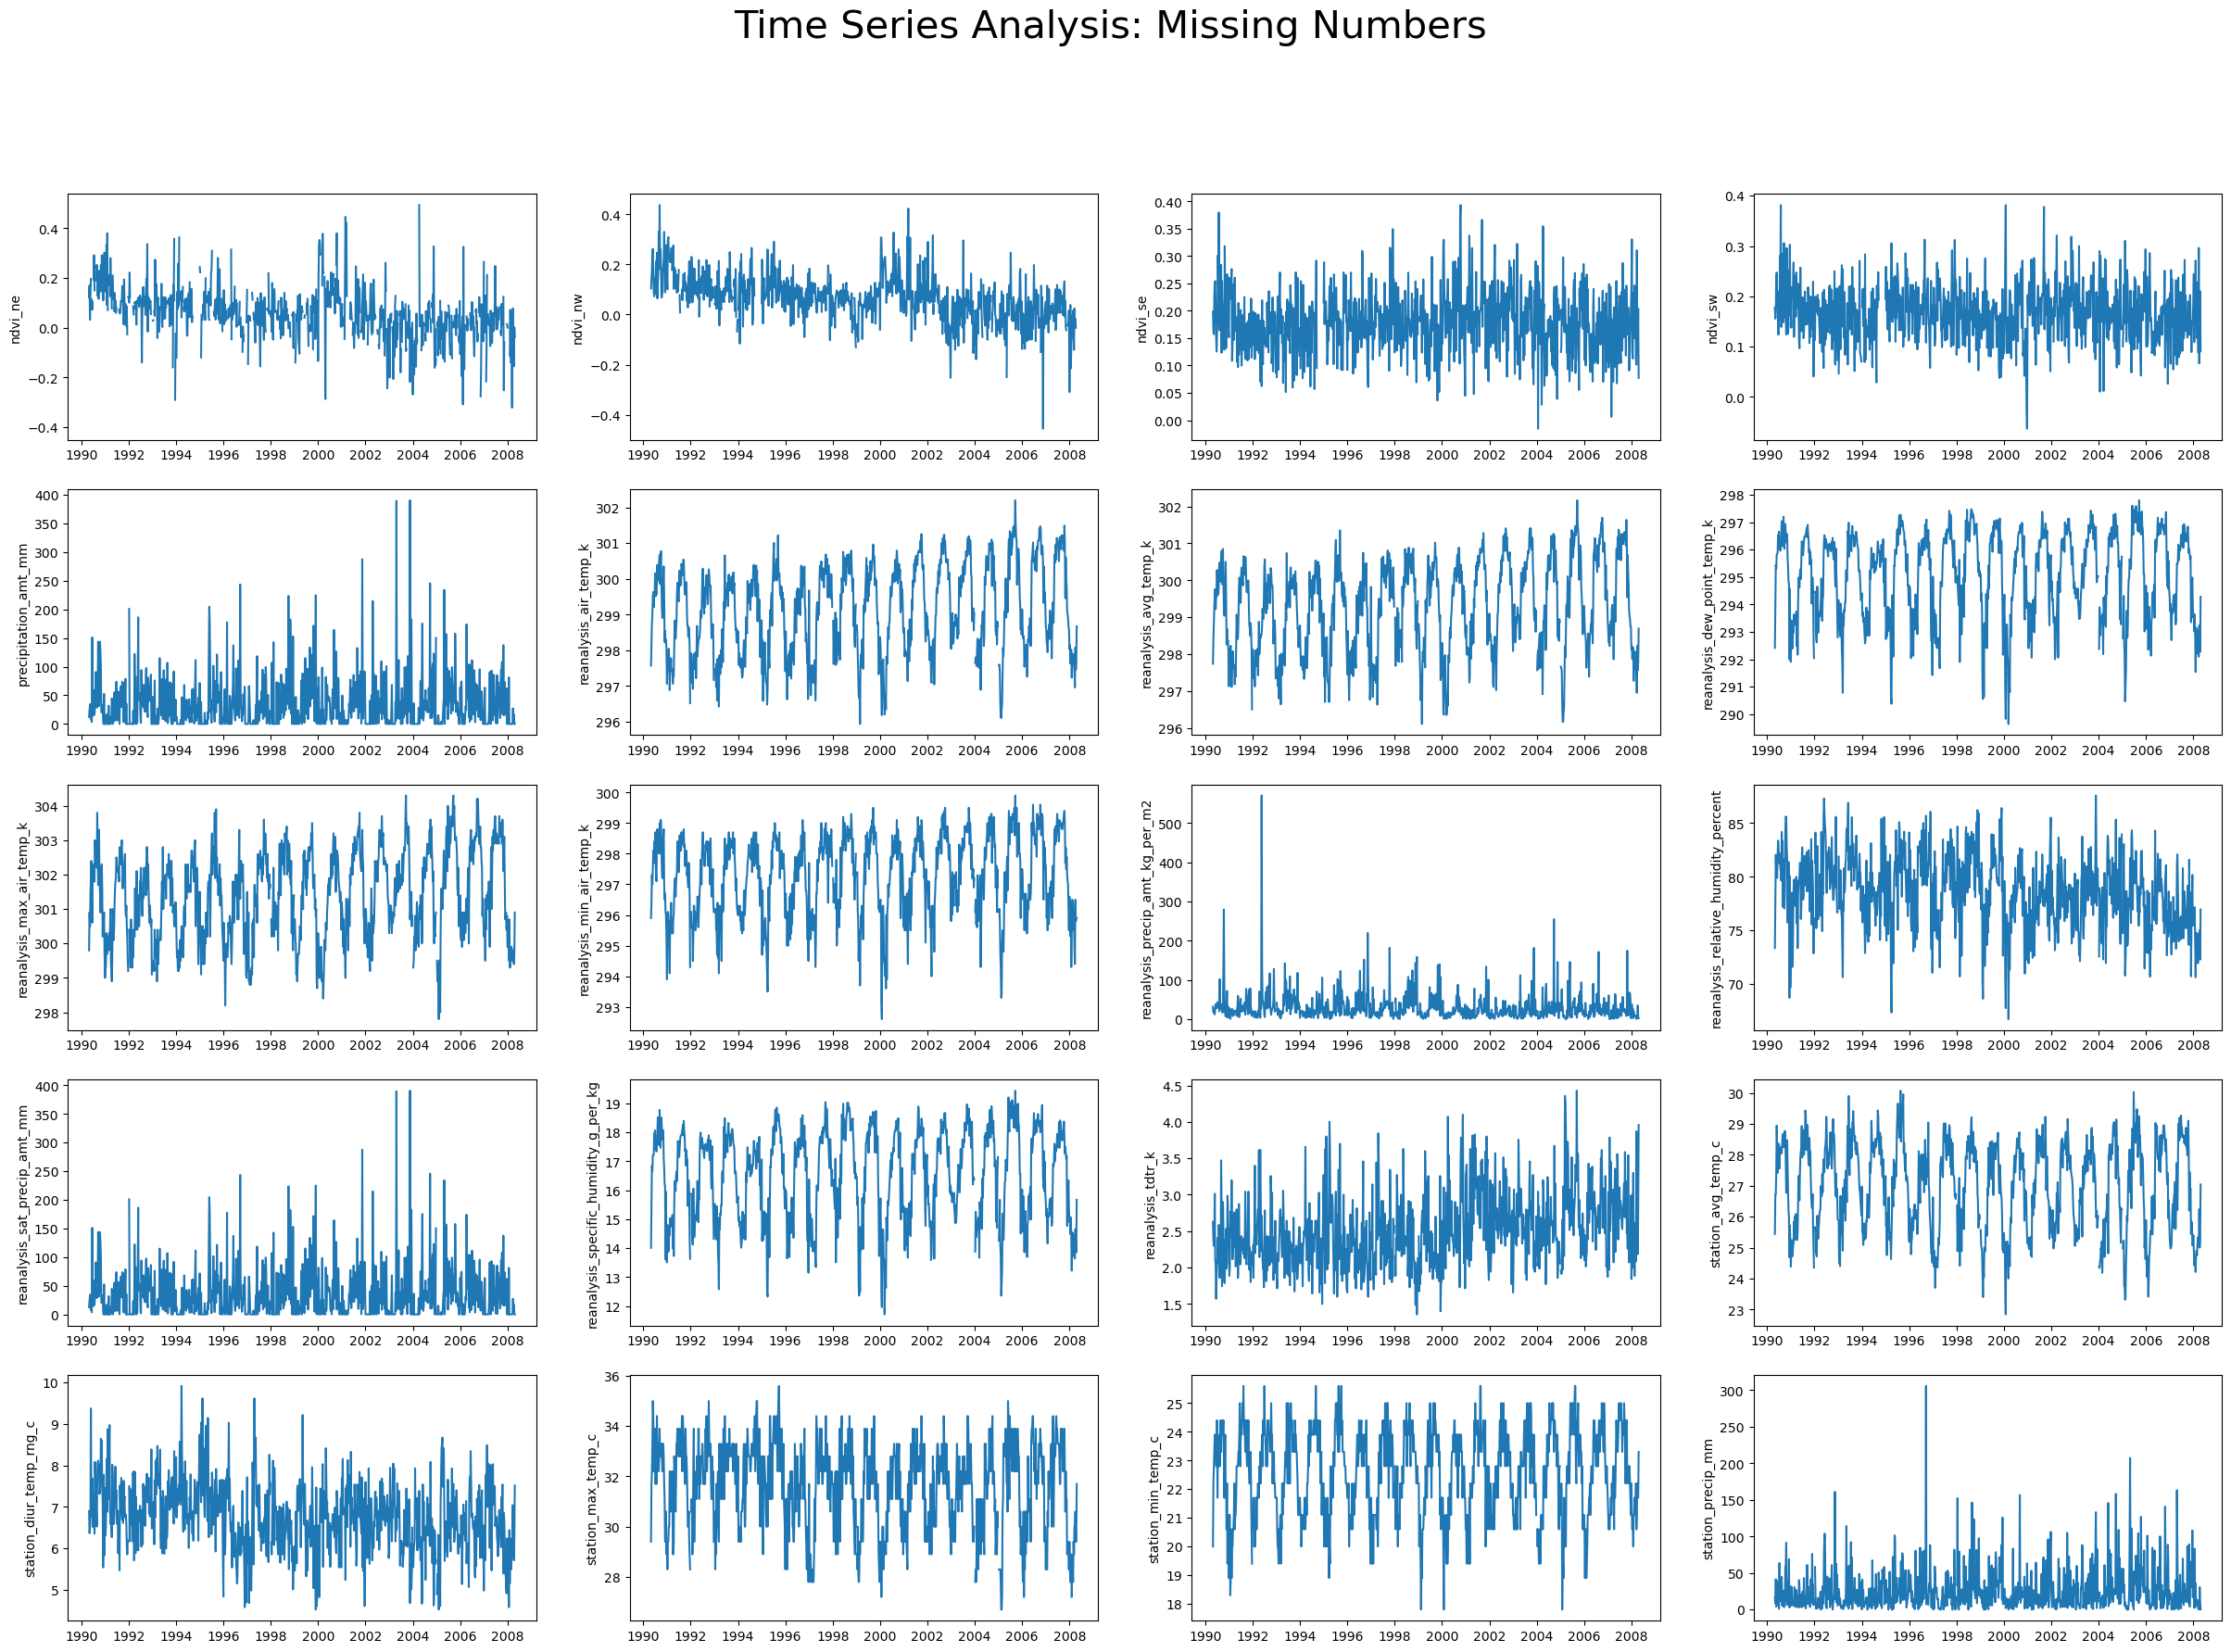

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting all columns that contain nan
fig, ax = plt.subplots(5, 4, figsize=(30, 20))
ax = ax.flatten()
plt.suptitle('Time Series Analysis: Missing Numbers', fontsize=30)

for i in np.arange(0, 20):
    ax[i].plot(train_sj_nans.index, train_sj_nans[nans_columns[i]])
    ax[i].set_ylabel(nans_columns[i])

<AxesSubplot:xlabel='ndvi_ne'>

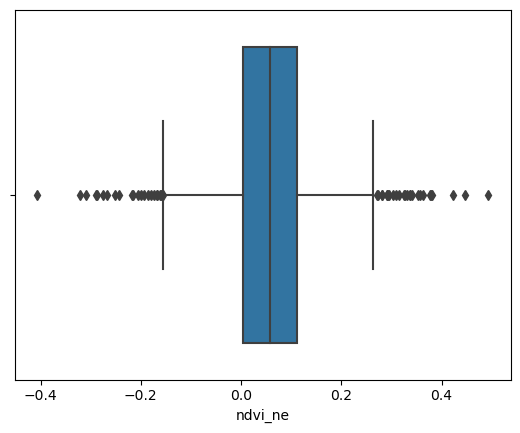

In [9]:
import seaborn as sns

sns.boxplot(data=train_sj_nans, x='ndvi_ne')

# *Use Boxplots like this ^ with every column that contains nan (must not have nans)*

# *Imputing Nans*

In [10]:
# Imputing with forward fill
train_sj_ffill_imputed = train_sj_nans.fillna(method='ffill')

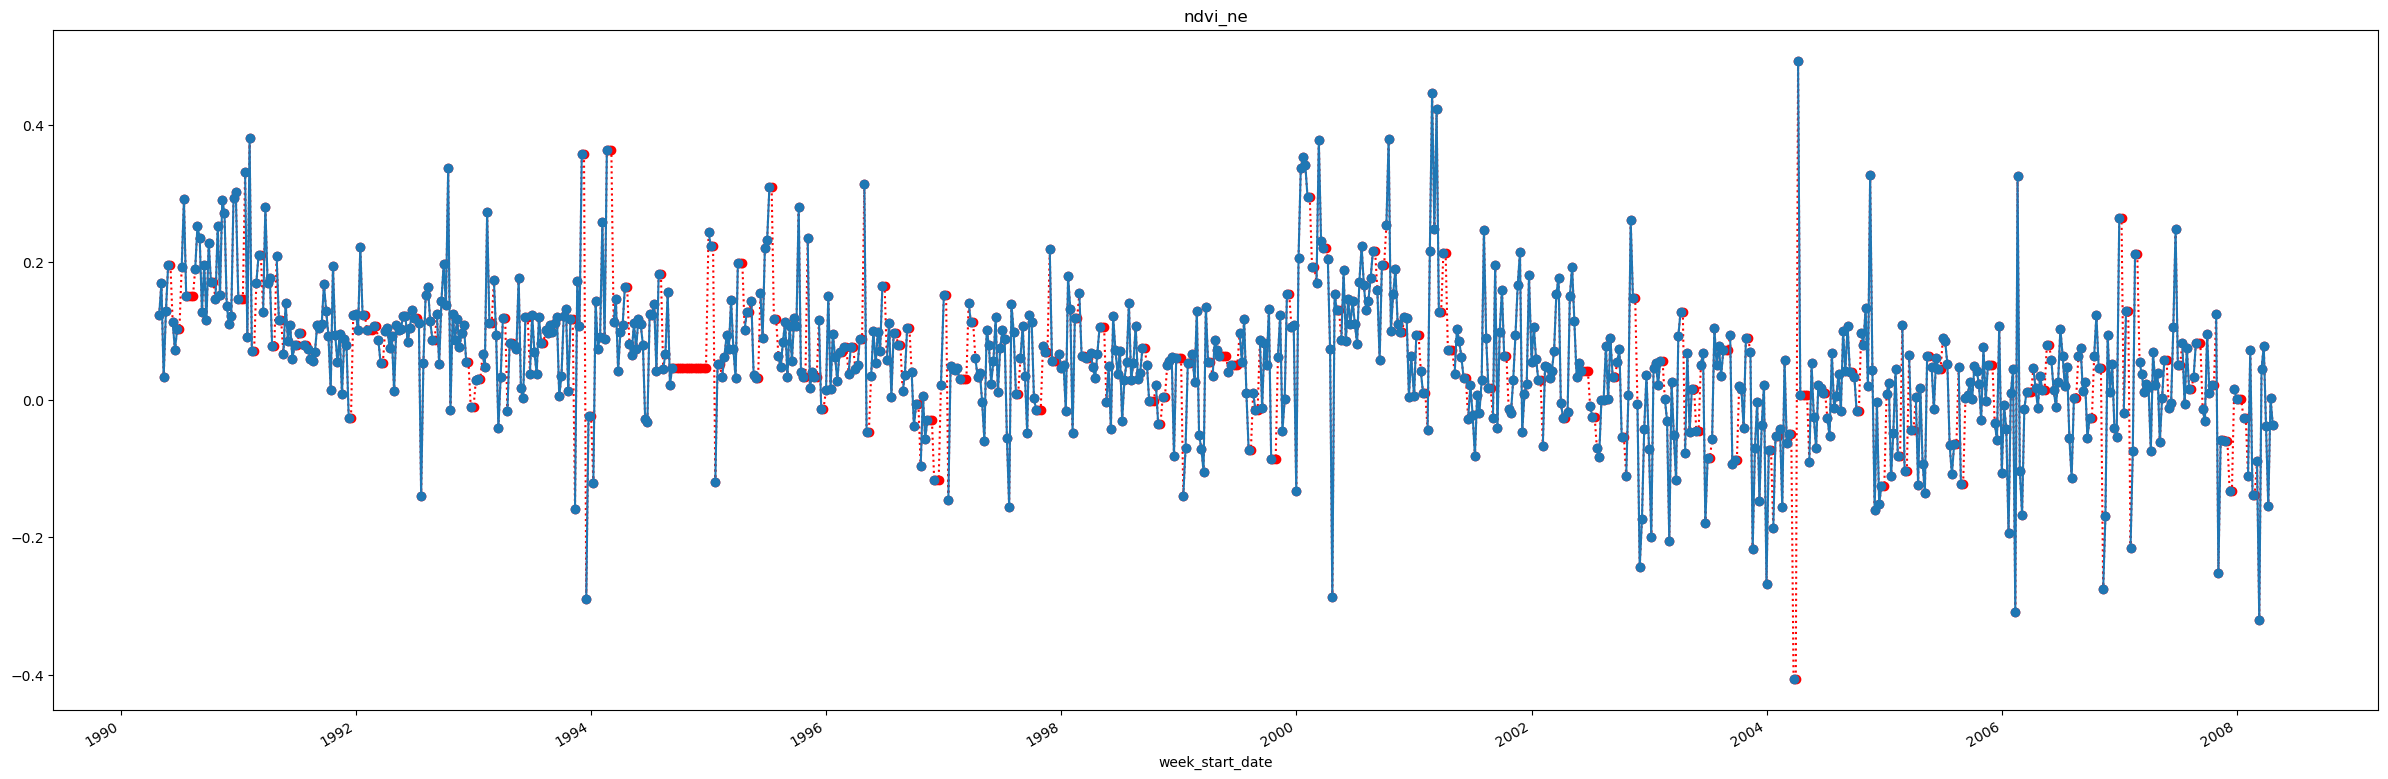

In [11]:
# Plotting imputed values with original data
train_sj_ffill_imputed['ndvi_ne'].plot(color='red', marker='o',
                                      linestyle='dotted',
                                      figsize=(30, 10))

train_sj_nans['ndvi_ne'].plot(title='ndvi_ne', marker='o', figsize=(30, 10))

plt.show()

In [12]:
# Imputing with backward fill
train_sj_bfill_imputed = train_sj_nans.fillna(method='bfill')

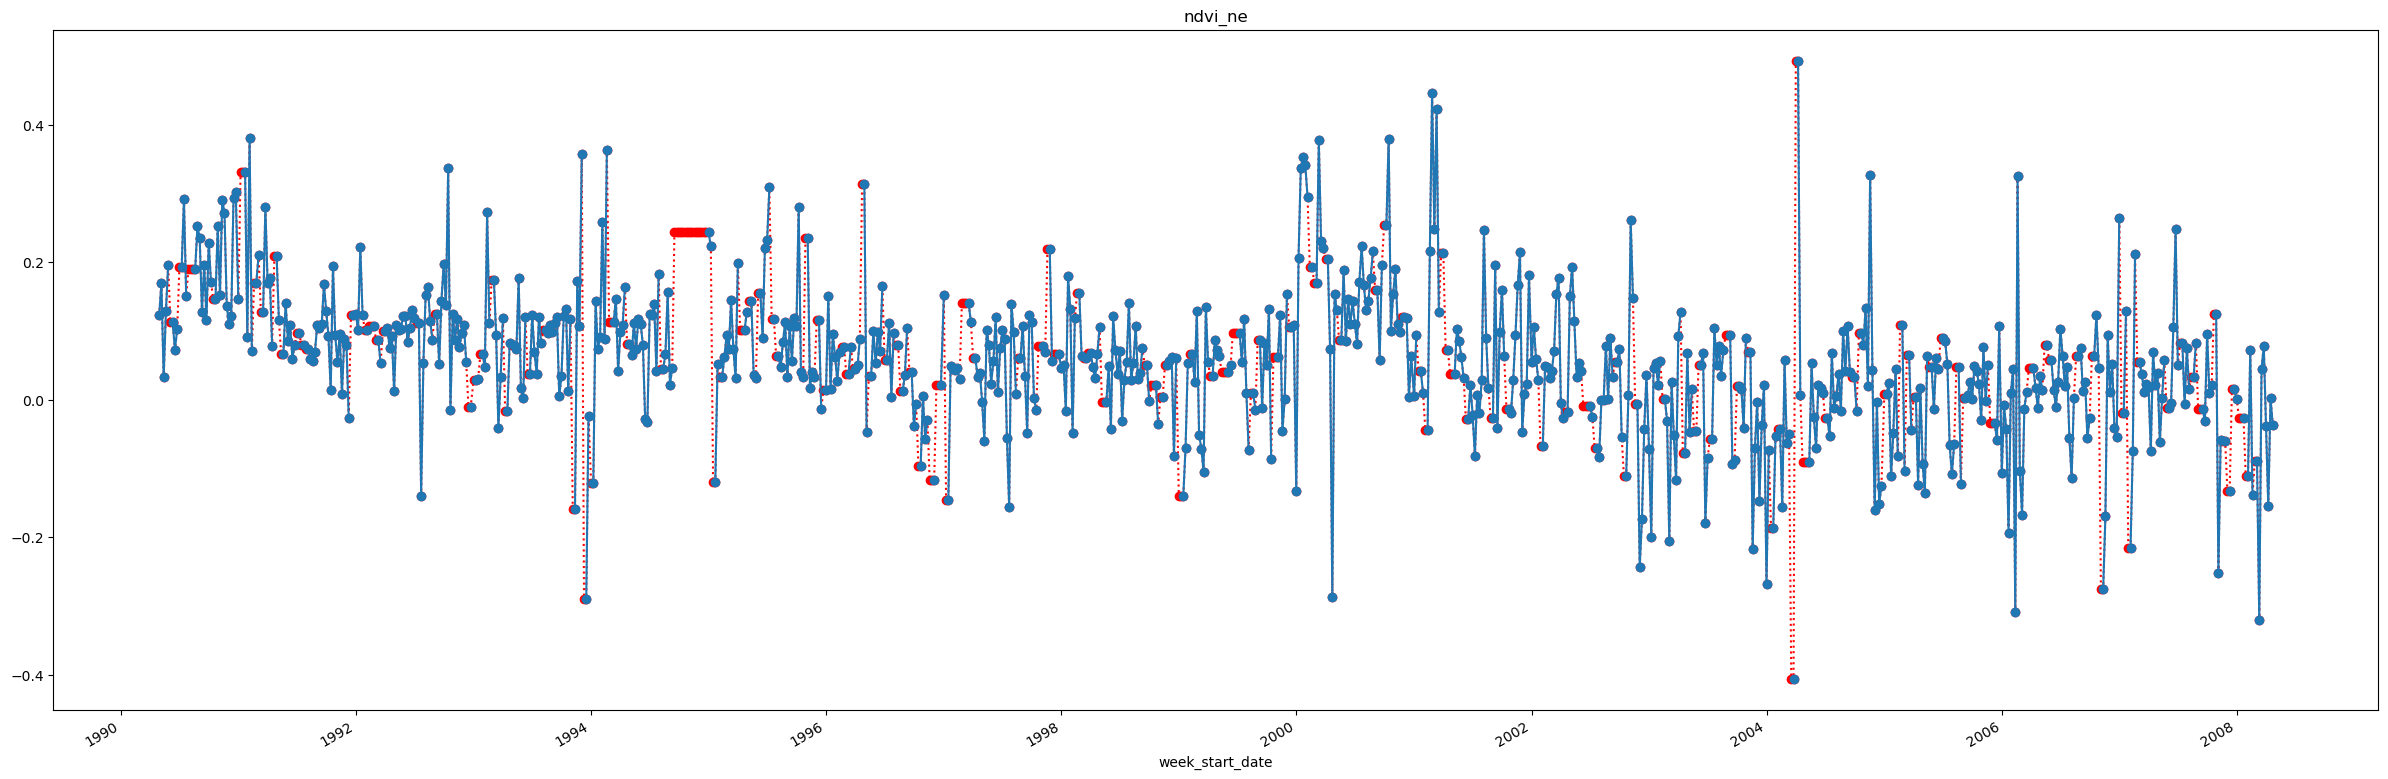

In [13]:
# Plotting imputed values with original data
train_sj_bfill_imputed['ndvi_ne'].plot(color='red', marker='o',
                                      linestyle='dotted',
                                      figsize=(30, 10))

train_sj_nans['ndvi_ne'].plot(title='ndvi_ne', marker='o', figsize=(30, 10))

plt.show()

In [14]:
# Interpolating nans
linear_sj = train_sj_nans.interpolate(method='linear')
quadratic_sj = train_sj_nans.interpolate(method='quadratic')
nearest_sj = train_sj_nans.interpolate(method='nearest')

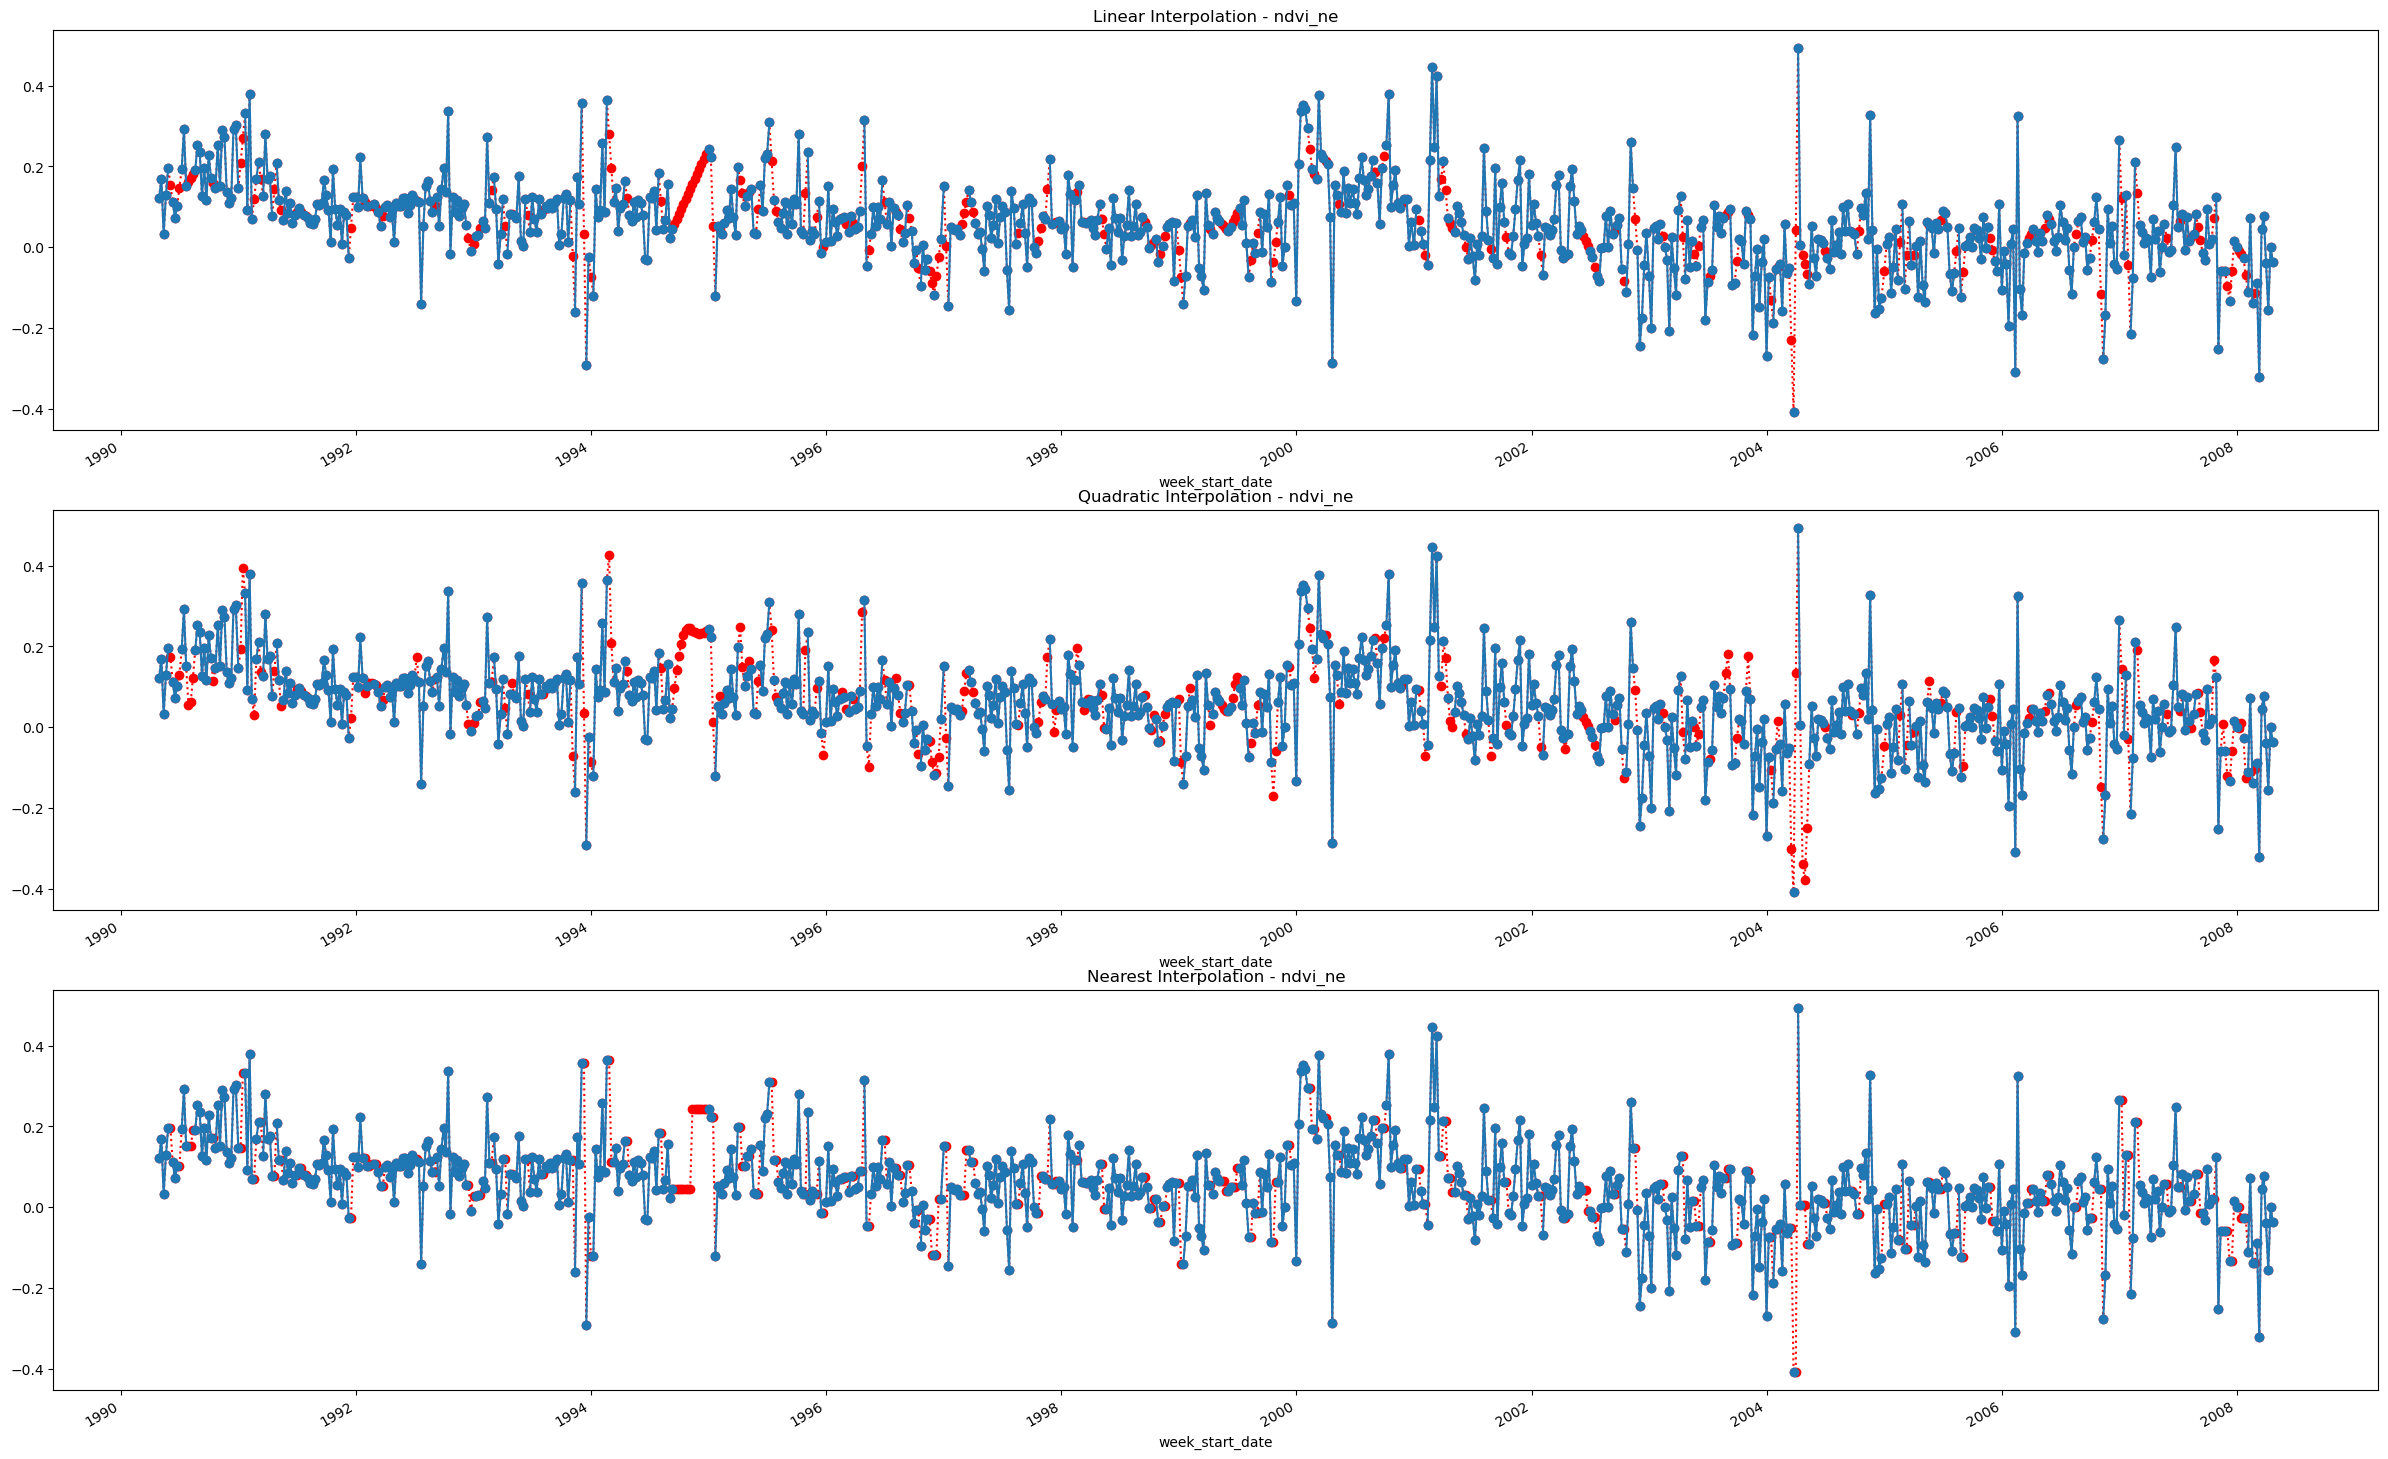

In [15]:
# Set nrows to 3 and ncols to 1
fig, axes = plt.subplots(3, 1, figsize=(30, 20))

# Create a dictionary of interpolations
interpolations = {'Linear Interpolation': linear_sj, 'Quadratic Interpolation': quadratic_sj, 
                  'Nearest Interpolation': nearest_sj}

# Loop over axes and interpolations
for ax, df_key in zip(axes, interpolations):
  # Select and also set the title for a DataFrame
    interpolations[df_key].ndvi_ne.plot(color='red', marker='o', 
                                 linestyle='dotted', ax=ax)
    train_sj_nans['ndvi_ne'].plot(title=df_key + ' - ndvi_ne', marker='o', ax=ax)
    
plt.show()

# *Linear Imputation*

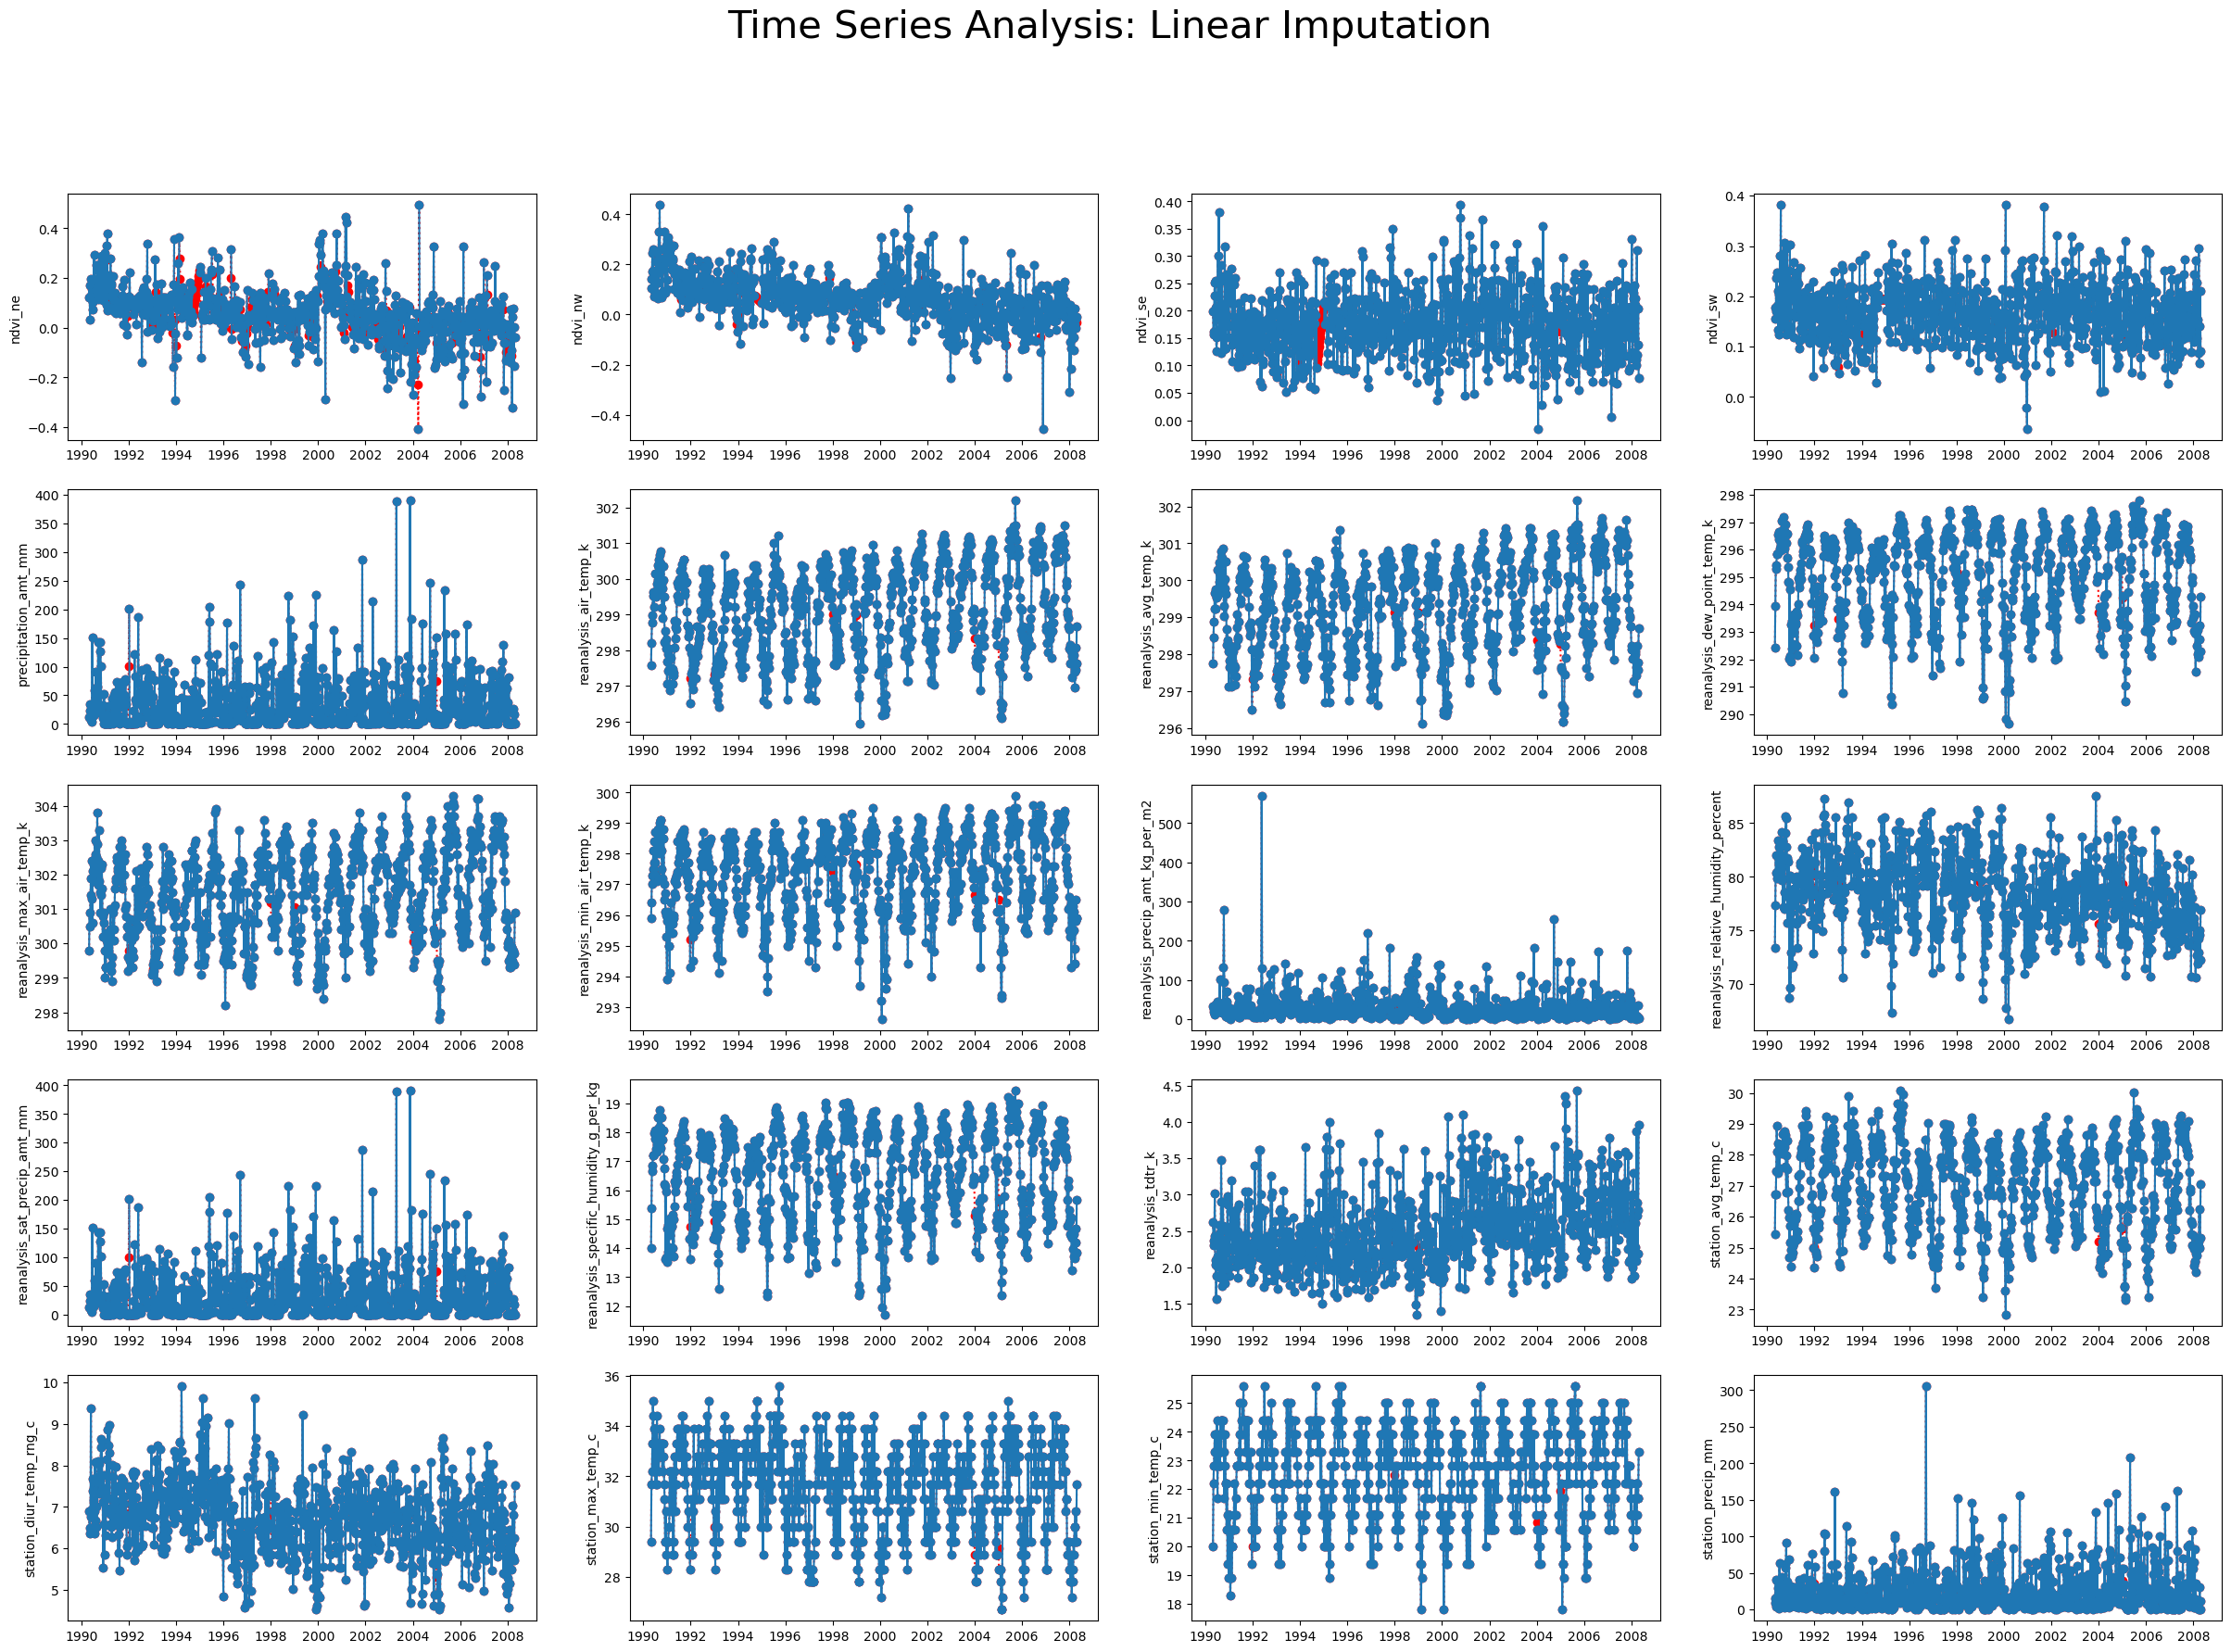

In [16]:
# Plotting the data with linear imputation
fig, ax = plt.subplots(5, 4, figsize=(30, 20))
ax = ax.flatten()
plt.suptitle('Time Series Analysis: Linear Imputation', fontsize=30)

for i in np.arange(0, 20):
    ax[i].plot(linear_sj.index, linear_sj[nans_columns[i]],
               color='red', marker='o', linestyle='dotted')
    
    ax[i].plot(train_sj_nans.index, train_sj_nans[nans_columns[i]], marker='o')
    
    ax[i].set_ylabel(nans_columns[i])

# *Linear imputated boxplots*

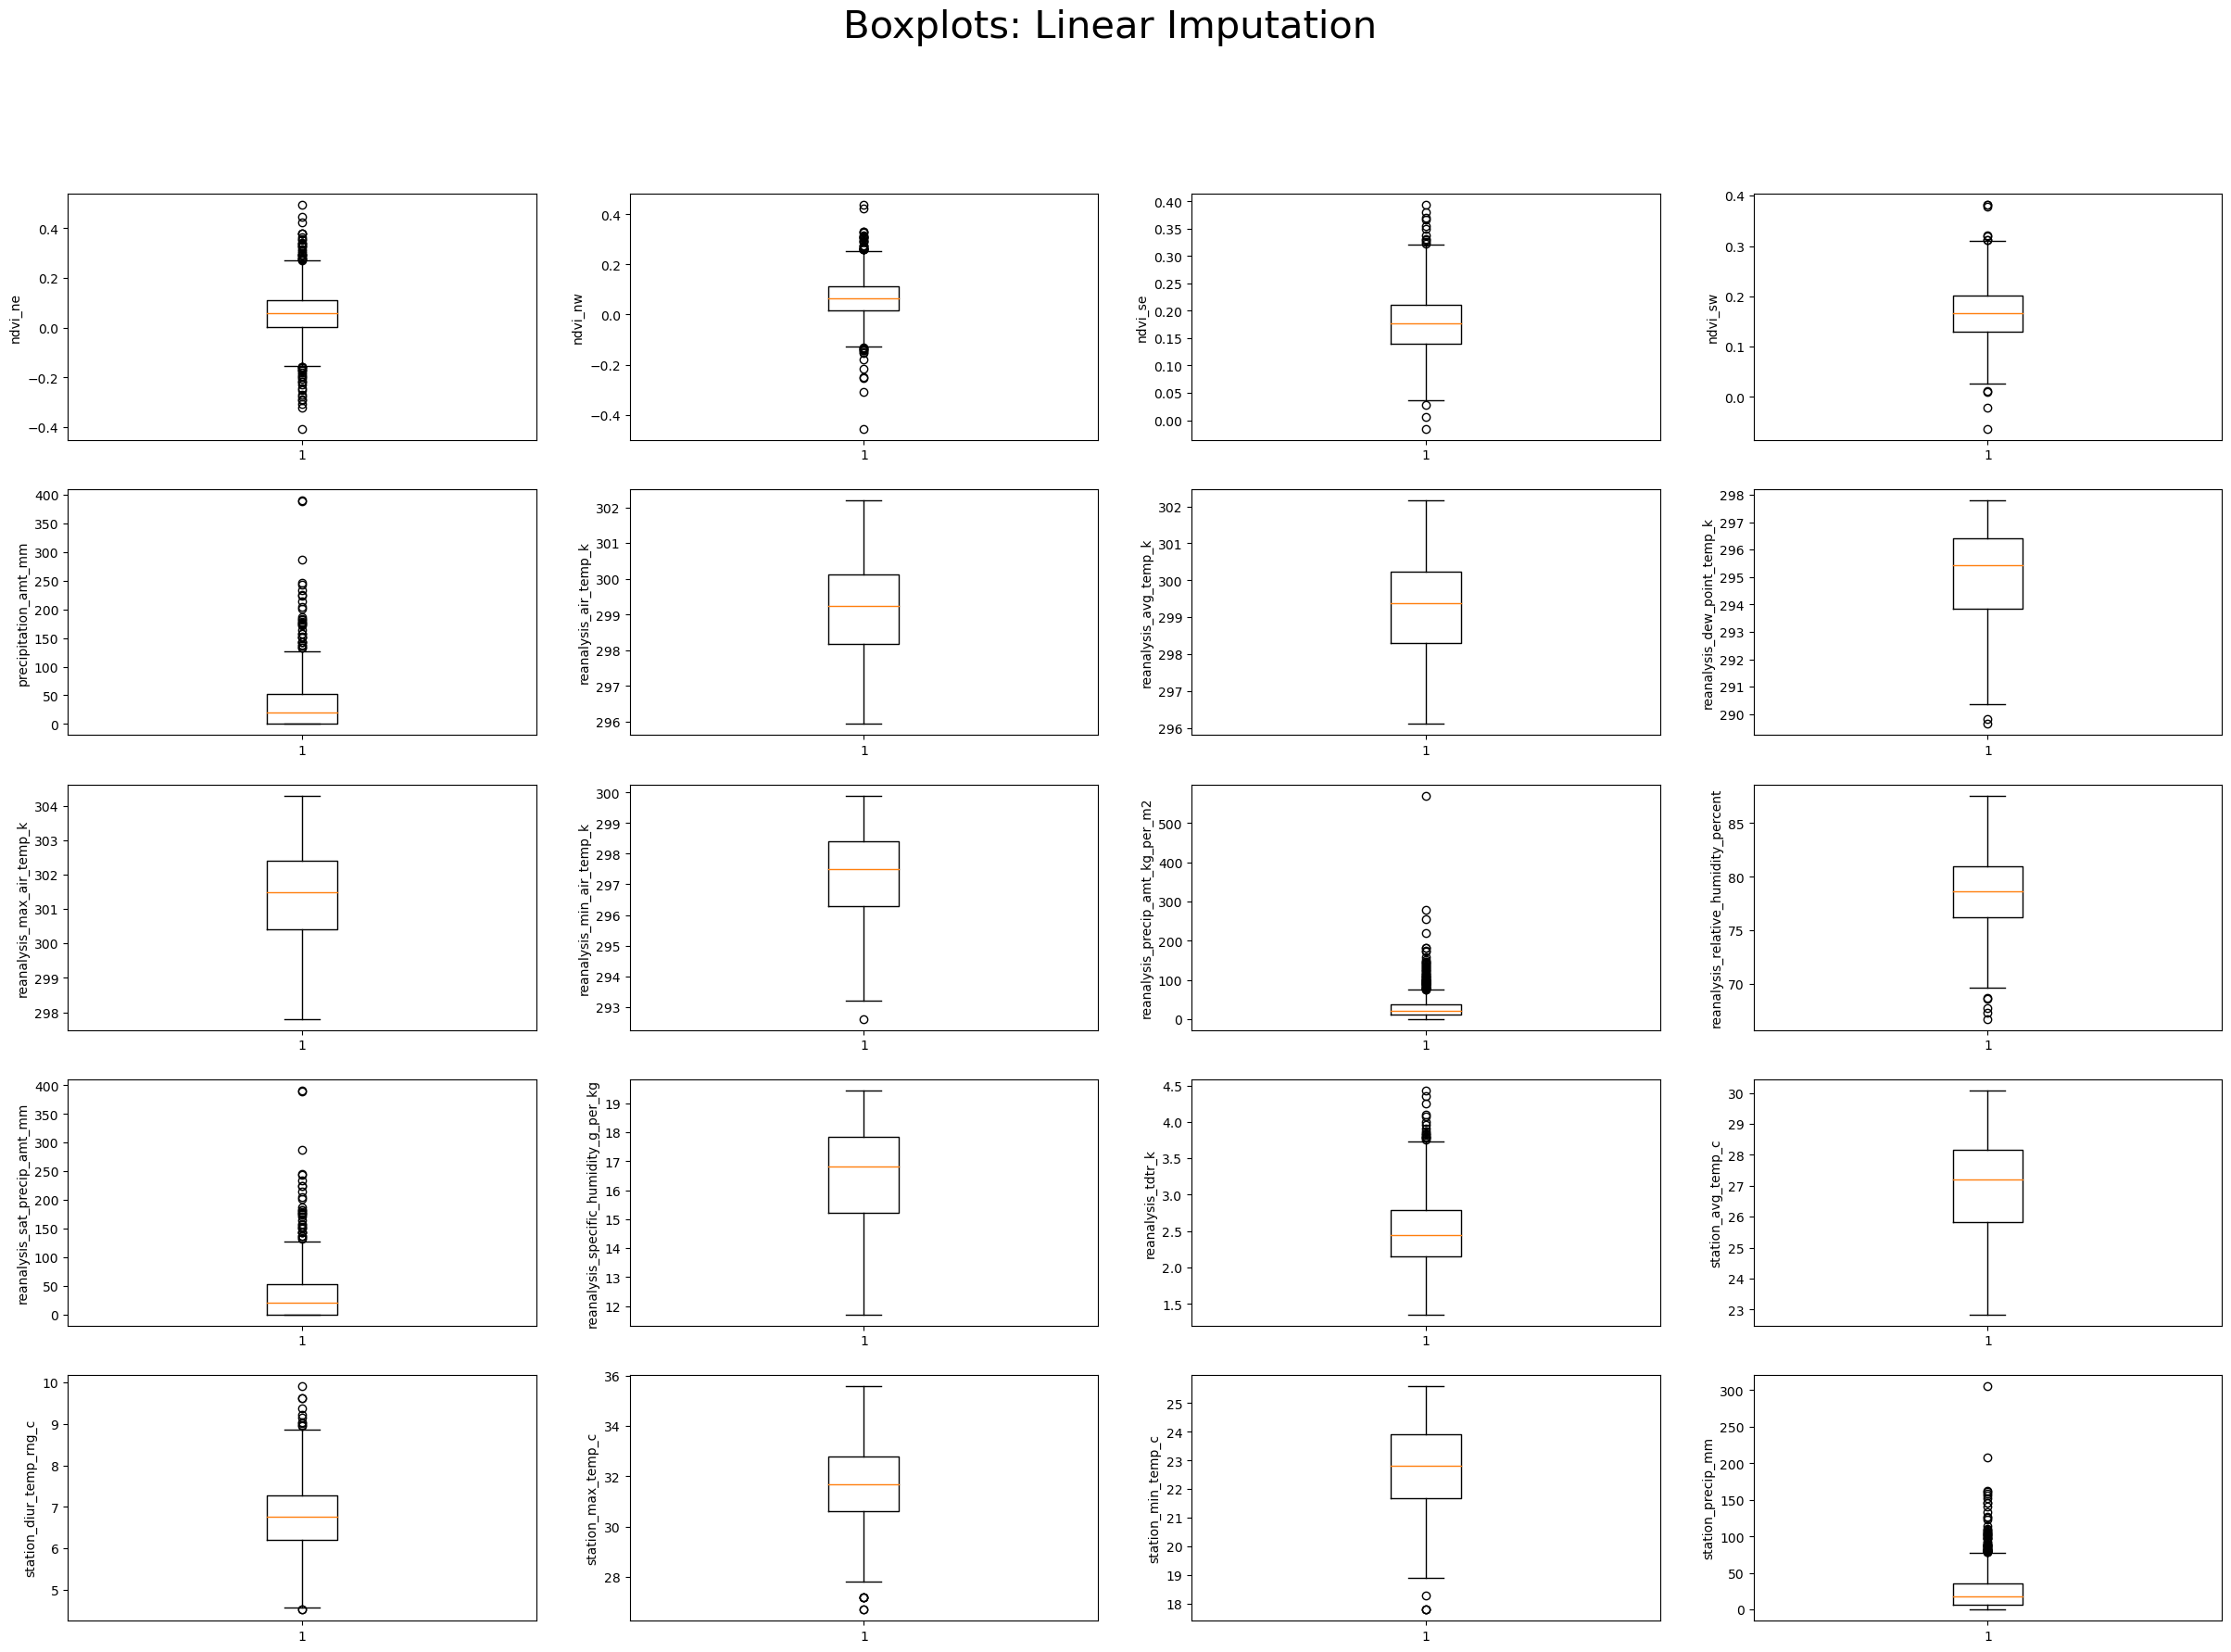

In [17]:
# Plotting all columns that contain nan
fig, ax = plt.subplots(5, 4, figsize=(30, 20))
ax = ax.flatten()
plt.suptitle('Boxplots: Linear Imputation', fontsize=30)

for i in np.arange(0, 20):
    ax[i].boxplot(linear_sj[nans_columns[i]])
    ax[i].set_ylabel(nans_columns[i])

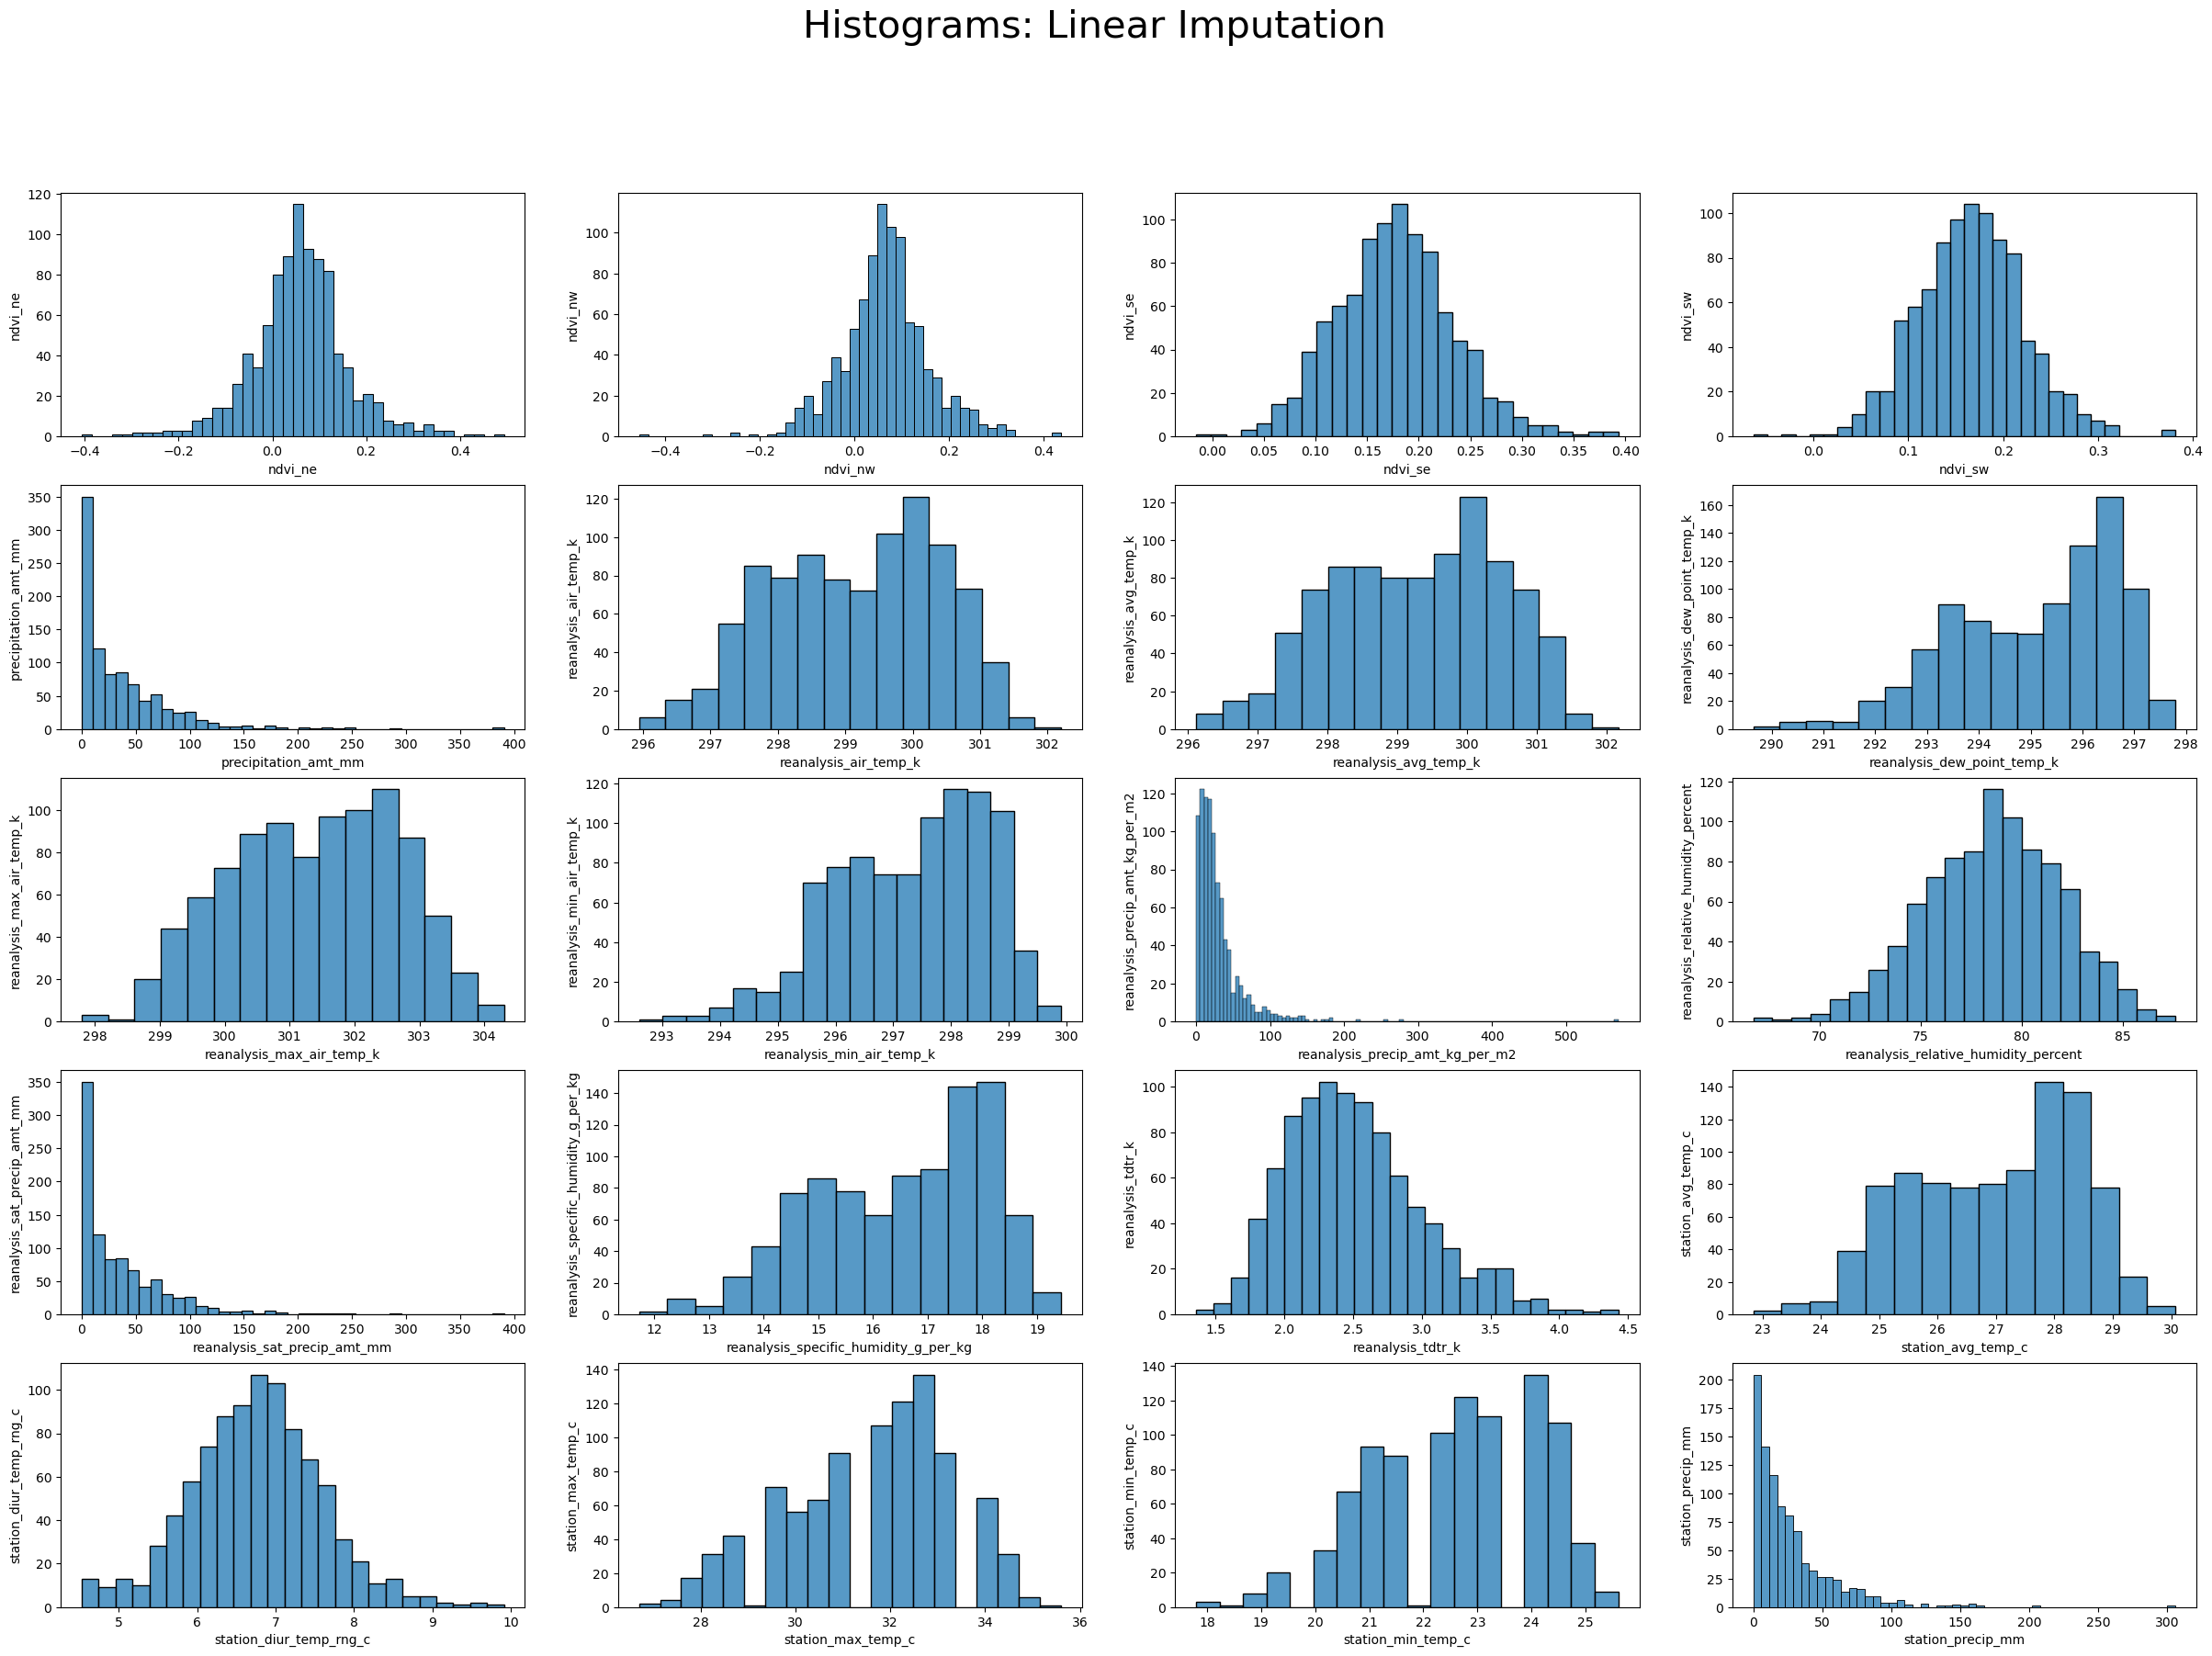

In [18]:
# Plotting all columns that contain nan
fig, ax = plt.subplots(5, 4, figsize=(30, 20))
ax = ax.flatten()
plt.suptitle('Histograms: Linear Imputation', fontsize=30)

for i in np.arange(0, 20):
    sns.histplot(data=linear_sj, x=linear_sj[nans_columns[i]], ax=ax[i])
    ax[i].set_ylabel(nans_columns[i])

# *Scaling data*

# *Uradi sve scalove sto postoje, i za svaki uradi hyper-paramater tuning, i SVM*

In [19]:
# Mean values
linear_sj.mean()

ndvi_ne                                    0.058096
ndvi_nw                                    0.066264
ndvi_se                                    0.177090
ndvi_sw                                    0.166088
precipitation_amt_mm                      35.385304
reanalysis_air_temp_k                    299.157295
reanalysis_avg_temp_k                    299.270520
reanalysis_dew_point_temp_k              295.103507
reanalysis_max_air_temp_k                301.391506
reanalysis_min_air_temp_k                297.297222
reanalysis_precip_amt_kg_per_m2           30.423622
reanalysis_relative_humidity_percent      78.568907
reanalysis_sat_precip_amt_mm              35.385304
reanalysis_specific_humidity_g_per_kg     16.546255
reanalysis_tdtr_k                          2.514225
station_avg_temp_c                        26.997940
station_diur_temp_rng_c                    6.753892
station_max_temp_c                        31.596207
station_min_temp_c                        22.593803
station_prec

In [20]:
linear_sj.var()

ndvi_ne                                     0.010539
ndvi_nw                                     0.008334
ndvi_se                                     0.003241
ndvi_sw                                     0.003111
precipitation_amt_mm                     1982.766991
reanalysis_air_temp_k                       1.528494
reanalysis_avg_temp_k                       1.485200
reanalysis_dew_point_temp_k                 2.458332
reanalysis_max_air_temp_k                   1.586000
reanalysis_min_air_temp_k                   1.673035
reanalysis_precip_amt_kg_per_m2          1261.869436
reanalysis_relative_humidity_percent       11.427398
reanalysis_sat_precip_amt_mm             1982.766991
reanalysis_specific_humidity_g_per_kg       2.430036
reanalysis_tdtr_k                           0.248138
station_avg_temp_c                          2.003725
station_diur_temp_rng_c                     0.698368
station_max_temp_c                          2.957085
station_min_temp_c                          2.

In [21]:
# Normalize columns with large variance
# Log normalization
#linear_sj['log'] = np.log(linear_sj['column'])

In [22]:
from sklearn.preprocessing import RobustScaler

# Scaling train and test data
train_linear = linear_sj.iloc[:-100]
test_linear = linear_sj.iloc[-100:]

scaler = RobustScaler()
train_linear_scaled = scaler.fit_transform(train_linear)
test_linear_scaled = scaler.transform(test_linear)

In [23]:
# Turning numpy arrays into dataframes
train_linear_scaled_df = pd.DataFrame(train_linear_scaled,
                                      index=train_linear.index,
                                      columns=train_linear.columns)

test_linear_scaled_df = train_linear_scaled_df = pd.DataFrame(test_linear_scaled,
                                      index=test_linear.index,
                                      columns=test_linear.columns)

# *Boxplots: Train data, Scaled + Imputed*

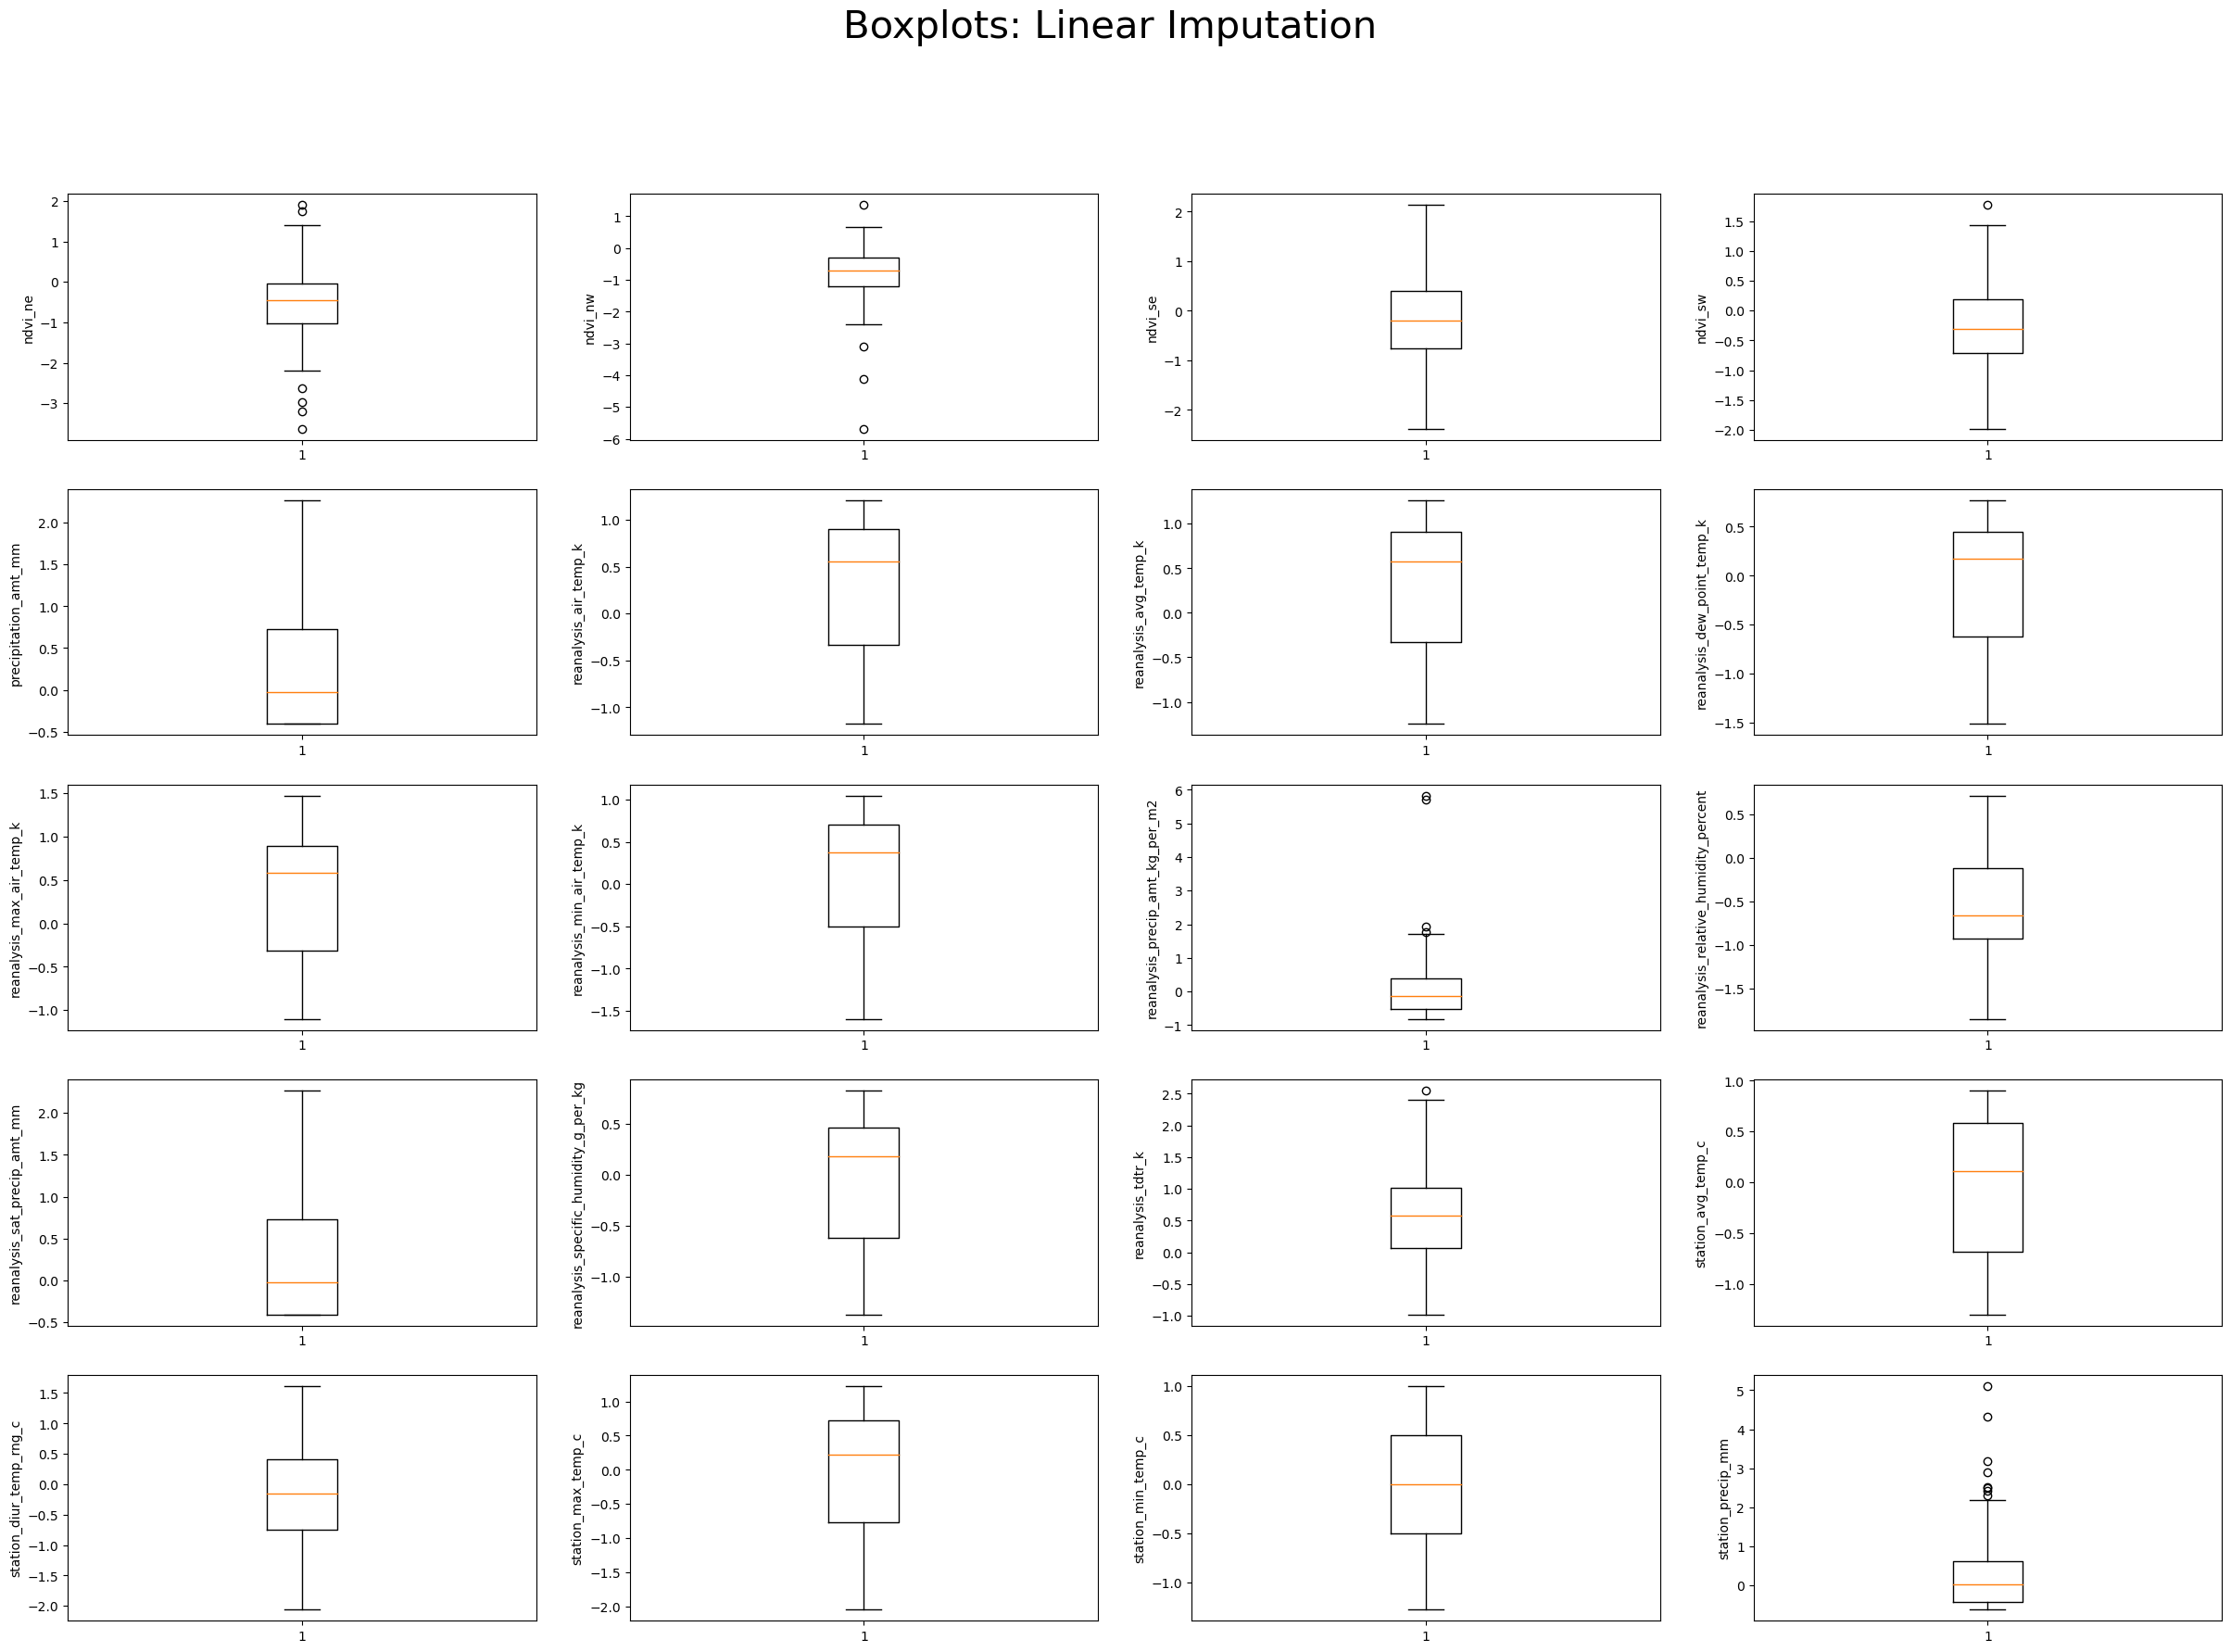

In [24]:
# Plotting all columns that contain nan
fig, ax = plt.subplots(5, 4, figsize=(30, 20))
ax = ax.flatten()
plt.suptitle('Boxplots: Linear Imputation', fontsize=30)

for i in np.arange(0, 20):
    ax[i].boxplot(train_linear_scaled_df[nans_columns[i]])
    ax[i].set_ylabel(nans_columns[i])

# *Histograms: Train data, Scaled + Imputed*

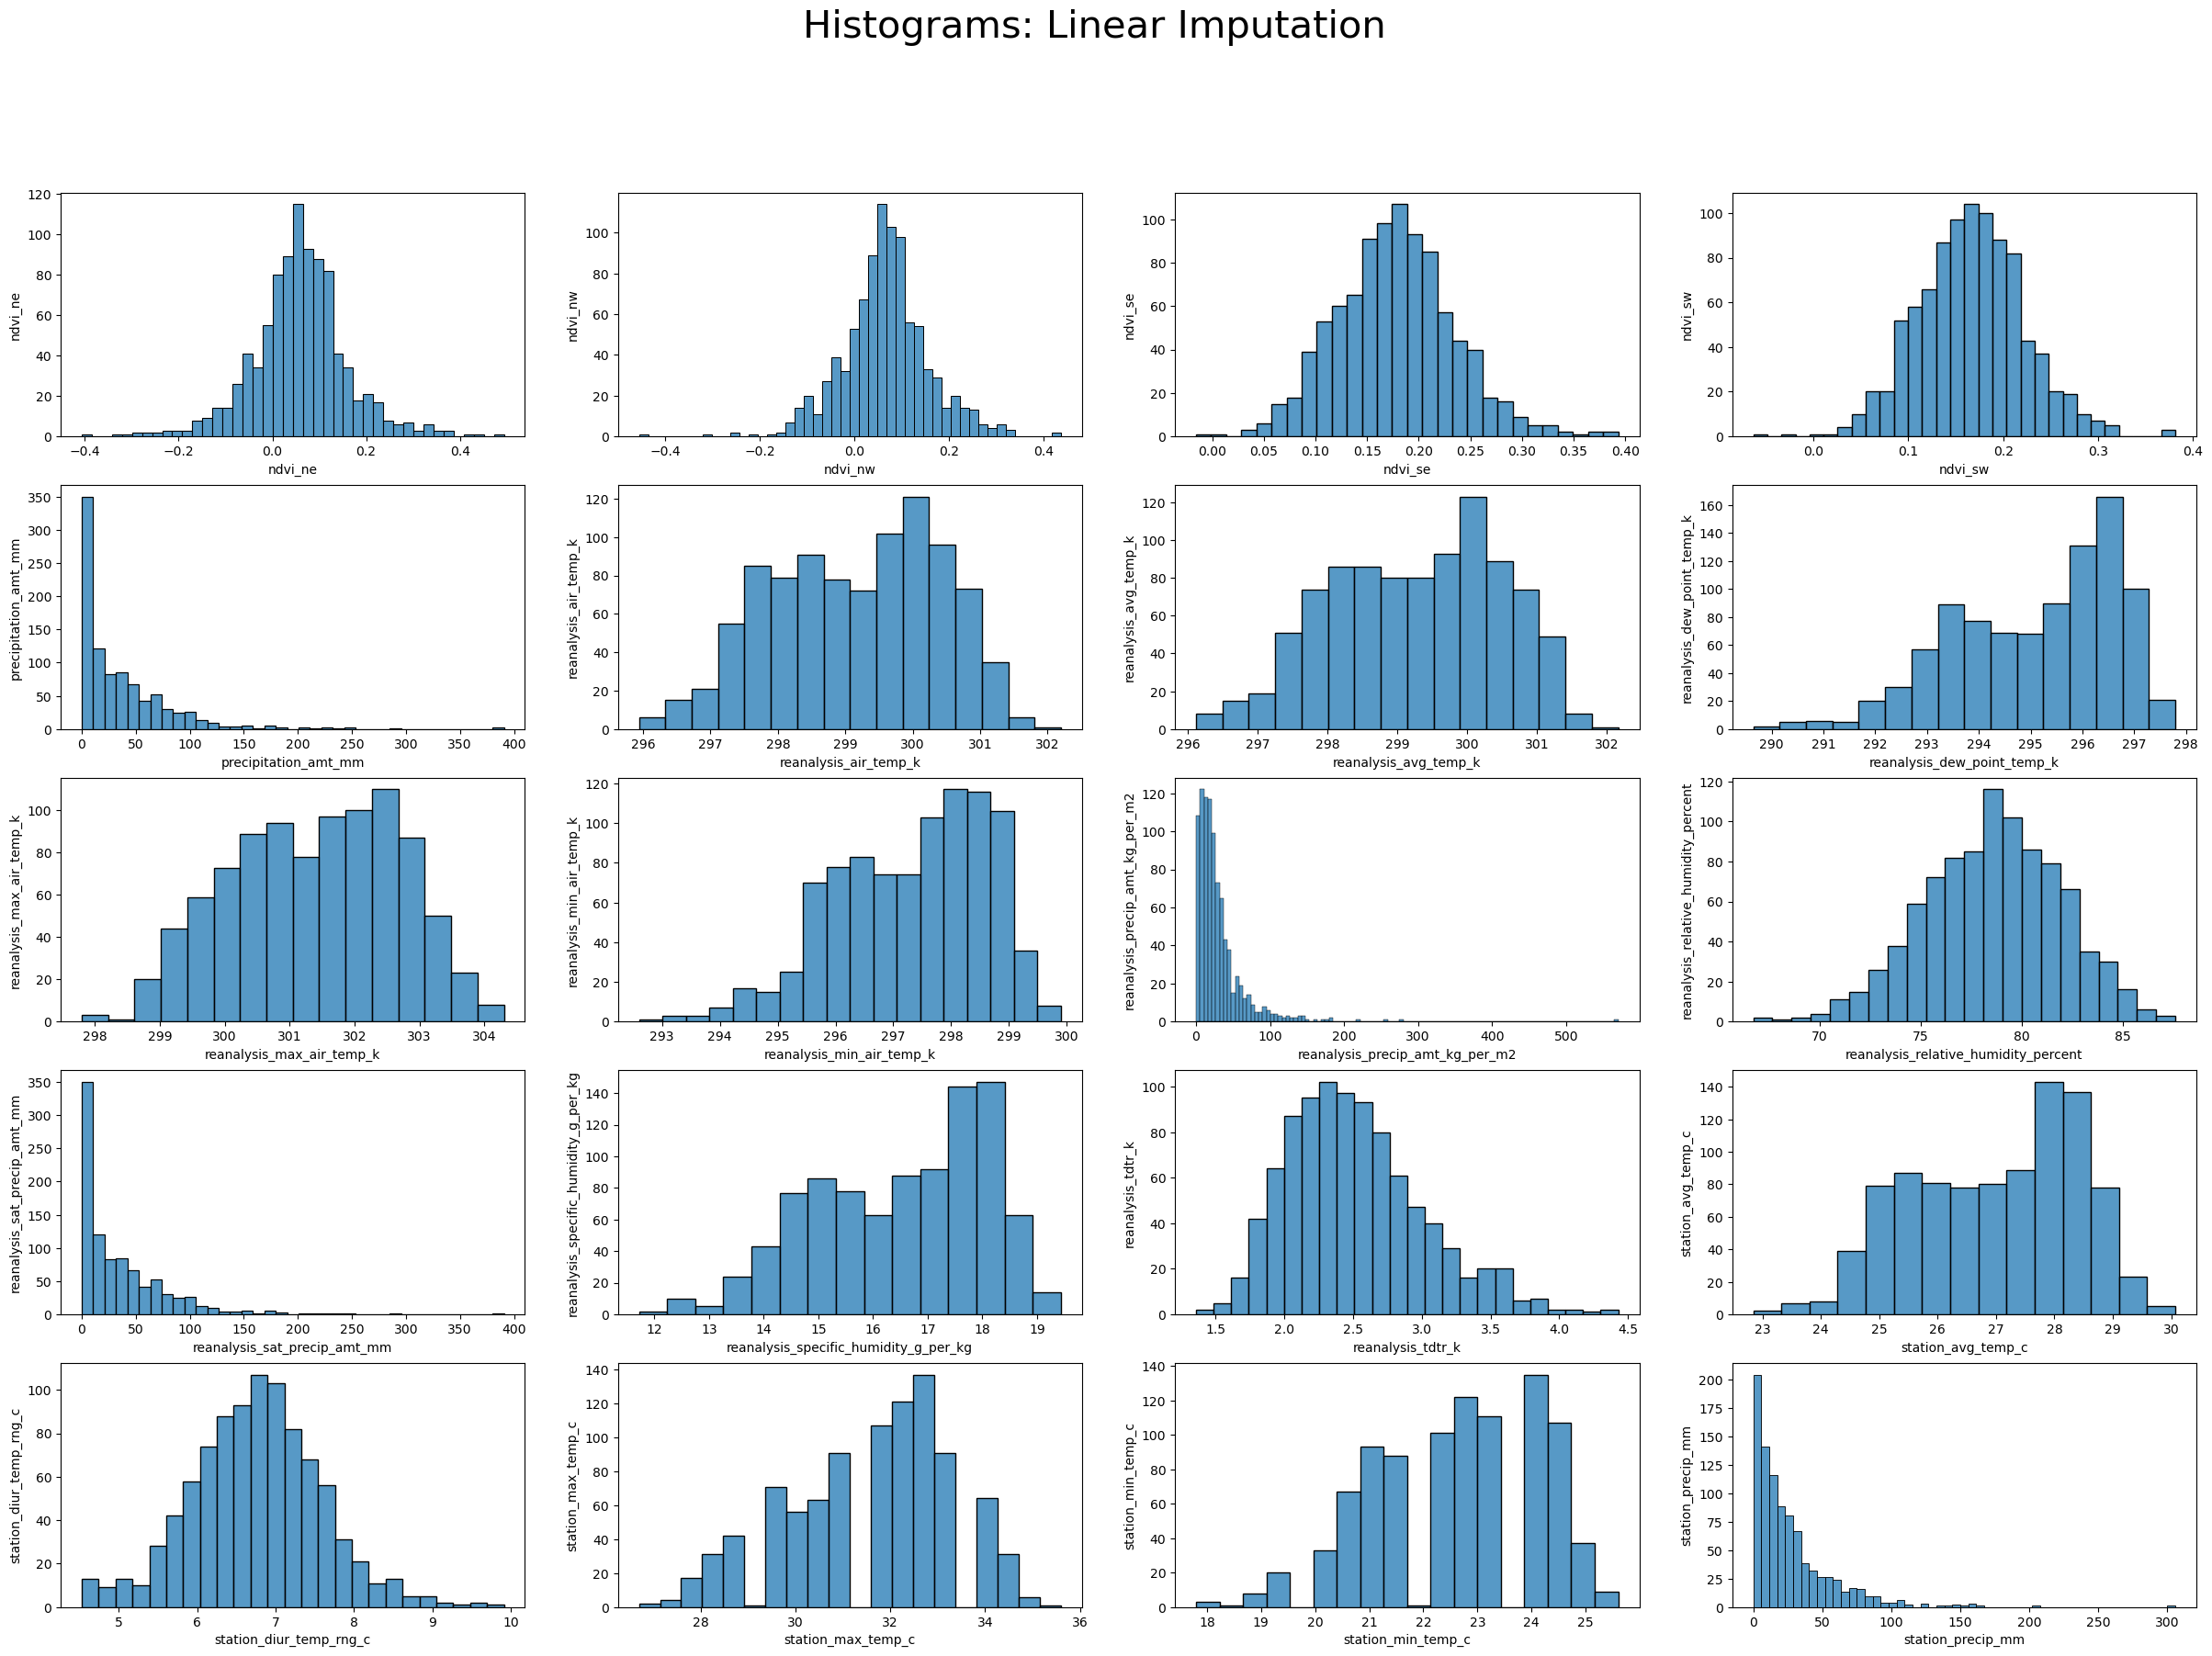

In [25]:
# Plotting all columns that contain nan
fig, ax = plt.subplots(5, 4, figsize=(30, 20))
ax = ax.flatten()
plt.suptitle('Histograms: Linear Imputation', fontsize=30)

for i in np.arange(0, 20):
    sns.histplot(data=test_linear_scaled_df, x=linear_sj[nans_columns[i]], ax=ax[i])
    ax[i].set_ylabel(nans_columns[i])

# *Resiti problem sa scalovanjem, nauciti kako se scaluje*

In [26]:
train_linear_scaled_df

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
week_start_date                                                                 
2006-05-28       0.056979 -1.852589  0.873786  0.564662             -0.335001   
2006-06-04      -0.046905 -0.413566 -0.894353 -0.942227              0.854603   
2006-06-11      -0.460552 -0.619474 -1.011008 -0.486175             -0.019626   
2006-06-18      -0.691300 -1.390351 -0.355589 -0.263436             -0.259995   
2006-06-25      -0.355723 -0.314066 -0.976750 -0.809038             -0.019237   
...                   ...       ...       ...       ...                   ...   
2008-03-25       0.138669 -1.204091  1.852855  1.767121              0.121448   
2008-04-01      -0.955417 -0.955745 -0.805266 -1.421862             -0.332669   
2008-04-08      -2.062252 -1.342440 -0.549529 -0.383708             -0.077338   
2008-04-15      -0.579546 -1.114281  0.370492  0.568429             -0.406898   
2008-04-22      -0.945973 -0.886123 -1.390263 -1.086117             -0.406898   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
week_start_date                                                 
2006-05-28                    0.686466               0.744318   
2006-06-04                    0.722556               0.774621   
2006-06-11                    0.827068               0.846591   
2006-06-18                    0.960150               0.971591   
2006-06-25                    0.674436               0.649621   
...                                ...                    ...   
2008-03-25                   -1.178195              -1.248106   
2008-04-01                   -0.587218              -0.573864   
2008-04-08                   -0.914286              -0.926136   
2008-04-15                   -0.824812              -0.812500   
2008-04-22                   -0.275940              -0.327652   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
week_start_date                                                           
2006-05-28                          0.377532                   0.736842   
2006-06-04                          0.200363                   0.736842   
2006-06-11                          0.255135                   0.947368   
2006-06-18                          0.375856                   1.000000   
2006-06-25                          0.485958                   0.526316   
...                                      ...                        ...   
2008-03-25                         -1.293000                  -0.894737   
2008-04-01                         -0.847003                  -0.842105   
2008-04-08                         -1.043733                  -1.052632   
2008-04-15                         -1.223138                  -0.894737   
2008-04-22                         -0.438452                  -0.263158   

                 reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
week_start_date                                                               
2006-05-28                            0.75                        -0.592303   
2006-06-04                            0.55                        -0.587731   
2006-06-11                            0.55                        -0.545437   
2006-06-18                            1.05                        -0.351114   
2006-06-25                            0.60                         0.682225   
...                                    ...                              ...   
2008-03-25                           -1.55                        -0.535912   
2008-04-01                           -0.50                        -0.683749   
2008-04-08                           -0.85                         0.510002   
2008-04-15                           -0.80                        -0.639931   
2008-04-22                           -0.80                        -0.740903   

                 reanalysis_relative_humidity_percent  \
week_start_date                                         


In [27]:
labels.head(5)

city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6

In [28]:
train_linear.head(5)

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
week_start_date                                                                 
1990-04-30       0.122600  0.103725  0.198483  0.177617                 12.42   
1990-05-07       0.169900  0.142175  0.162357  0.155486                 22.82   
1990-05-14       0.032250  0.172967  0.157200  0.170843                 34.54   
1990-05-21       0.128633  0.245067  0.227557  0.235886                 15.36   
1990-05-28       0.196200  0.262200  0.251200  0.247340                  7.52   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
week_start_date                                                 
1990-04-30                  297.572857             297.742857   
1990-05-07                  298.211429             298.442857   
1990-05-14                  298.781429             298.878571   
1990-05-21                  298.987143             299.228571   
1990-05-28                  299.518571             299.664286   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
week_start_date                                                           
1990-04-30                        292.414286                      299.8   
1990-05-07                        293.951429                      300.9   
1990-05-14                        295.434286                      300.5   
1990-05-21                        295.310000                      301.4   
1990-05-28                        295.821429                      301.9   

                 reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
week_start_date                                                               
1990-04-30                           295.9                            32.00   
1990-05-07                           296.4                            17.94   
1990-05-14                           297.3                            26.10   
1990-05-21                           297.0                            13.90   
1990-05-28                           297.5                            12.20   

                 reanalysis_relative_humidity_percent  \
week_start_date                                         
1990-04-30                                  73.365714   
1990-05-07                                  77.368571   
1990-05-14                                  82.052857   
1990-05-21                                  80.337143   
1990-05-28                                  80.460000   

                 reanalysis_sat_precip_amt_mm  \
week_start_date                                 
1990-04-30                              12.42   
1990-05-07                              22.82   
1990-05-14                              34.54   
1990-05-21                              15.36   
1990-05-28                               7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
week_start_date                                                             
1990-04-30                                   14.012857           2.628571   
1990-05-07                                   15.372857           2.371429   
1990-05-14                                   16.848571           2.300000   
1990-05-21                                   16.672857           2.428571   
1990-05-28                                   17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
week_start_date                                                
1990-04-30                25.442857                 6.900000   
1990-05-07                26.714286                 6.371429   
1990-05-14                26.714286                 6.485714   
1990-05-21                27.471429                 6.771429   
1990-05-28                28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
week_start_date                                                             
1990-04-30                 

# *Trebao sam ranije da mergujem, jos dok nisam izbrisao kolone koje imaju oba dataseta. Resiti ovo ispod*

In [29]:
train_data = train_linear.merge(labels, )

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

# *Baseline model without scaling*

In [ ]:
from sklearn.svm import SVC

# train_data = train_linear
# test_data = test_linear

# Baseline model
svm = SVC()
svm.fit(train_linear)